Import python packages

In [139]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Take the parsed .shr files (in .csv format)

In [131]:
filename = "parsed_SWEEP_REC_2024-03-12 21h36m56s.csv"
csv_file_path = os.path.join('output_file', filename)
data = pd.read_csv(csv_file_path)
data

,2024-03-12 21:36:58.082000,2024-03-12 21:36:59.199000,2024-03-12 21:37:00.299000,2024-03-12 21:37:01.399000,2024-03-12 21:37:02.498000,2024-03-12 21:37:03.610000,2024-03-12 21:37:04.711000,2024-03-12 21:37:05.813000,2024-03-12 21:37:06.914000,2024-03-12 21:37:08.016000,...,2024-03-12 21:37:20.119000,2024-03-12 21:37:21.221000,2024-03-12 21:37:22.323000,2024-03-12 21:37:23.425000,2024-03-12 21:37:24.528000,2024-03-12 21:37:25.619000,2024-03-12 21:37:26.717000,2024-03-12 21:37:27.816000,2024-03-12 21:37:28.918000,2024-03-12 21:37:30.019000
0,-50.332066,-51.675340,-50.462795,-50.765564,-51.151237,-49.623817,-49.928223,-50.566020,-54.306267,-53.243664,...,-54.13169,-52.024480,-49.807026,-50.034313,-49.855213,-50.485510,-51.77459,-51.985210,-50.092842,-59.960754
1,-62.597748,-63.850502,-62.817960,-63.167427,-63.342030,-62.035355,-62.341610,-62.907658,-66.018630,-65.476010,...,-65.99297,-64.429390,-62.187220,-62.367916,-62.179905,-62.860085,-64.10823,-64.240280,-62.296753,-71.652660
2,-64.326070,-65.679710,-64.661820,-64.766330,-65.184875,-63.753075,-64.117650,-64.501260,-67.931490,-66.673410,...,-67.77702,-65.739180,-64.042510,-64.278050,-64.061040,-64.479220,-65.41964,-65.427310,-64.283550,-71.075150
3,-67.340420,-68.880200,-67.571430,-67.447290,-67.951980,-66.954030,-67.133156,-67.007550,-70.818214,-68.306000,...,-70.55621,-67.751144,-67.181710,-67.580210,-67.232216,-67.142970,-67.42711,-67.360435,-67.238380,-70.451200
4,-71.398710,-72.033264,-71.327390,-71.648790,-70.672340,-72.149240,-71.444930,-70.751630,-71.422590,-70.458620,...,-71.43028,-70.964880,-71.552230,-71.723400,-71.570000,-71.184790,-70.58902,-70.331154,-70.386260,-70.453705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76797,-79.238160,-79.229390,-79.199280,-78.997700,-79.609200,-78.946560,-79.165390,-79.131676,-78.777885,-79.193780,...,-79.18972,-79.310394,-79.063640,-78.982880,-78.964150,-79.114380,-79.06913,-79.243440,-78.995940,-78.933470
76798,-79.048310,-79.246130,-78.886670,-79.300190,-79.472060,-78.782860,-79.167114,-79.126980,-78.899345,-79.067540,...,-78.99090,-79.384056,-79.144180,-78.940090,-79.124320,-79.195560,-79.15128,-79.323590,-79.027980,-78.774635
76799,-78.955940,-79.203890,-78.644394,-79.415596,-79.334640,-78.635700,-79.012420,-79.040695,-79.166600,-79.092610,...,-78.80502,-79.319840,-79.122350,-78.888600,-79.178260,-79.234750,-79.25575,-79.373590,-79.012955,-78.581566
76800,-79.028380,-79.007770,-78.525450,-79.402400,-79.095060,-78.672690,-78.892030,-79.028020,-79.210780,-79.041680,...,-78.80046,-79.087494,-78.961200,-78.966340,-79.188640,-79.111015,-79.39570,-79.439766,-79.091840,-78.574330


#### Data Pre-Processing

In [132]:
START_FREQ = 0                  # 0.0 Hz 
END_FREQ = 6000000000           # 6.0 GHz
FREQ_BIN_SIZE = 78124.97688     # ~78.125 KHz

# Transpose the DataFrame so that timestamps become the index
data = data.transpose()

num_columns = len(data.columns)  # Excluding the 'timestamp' column
frequency_values = [START_FREQ + i * FREQ_BIN_SIZE for i in range(num_columns)]

# Set data timestamp to be index column
data.index.name='Timestamp'
data.index = pd.to_datetime(data.index)

# Name subsequent columns based on the frequency
data.columns = frequency_values
data.head()

,0.000000e+00,7.812498e+04,1.562500e+05,2.343749e+05,3.124999e+05,3.906249e+05,4.687499e+05,5.468748e+05,6.249998e+05,7.031248e+05,...,5.999373e+09,5.999451e+09,5.999529e+09,5.999608e+09,5.999686e+09,5.999764e+09,5.999842e+09,5.999920e+09,5.999998e+09,6.000076e+09
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-12 21:36:58.082,-50.332066,-62.597748,-64.326070,-67.34042,-71.398710,-72.419464,-72.155106,-71.28321,-70.146010,-69.323980,...,-78.839485,-78.983590,-79.118540,-79.25792,-79.402620,-79.23816,-79.04831,-78.955940,-79.02838,-79.031630
2024-03-12 21:36:59.199,-51.675340,-63.850502,-65.679710,-68.88020,-72.033264,-72.551660,-72.110954,-71.02232,-70.246895,-69.421585,...,-79.179924,-79.146324,-79.092545,-79.07713,-79.124070,-79.22939,-79.24613,-79.203890,-79.00777,-78.799515
2024-03-12 21:37:00.299,-50.462795,-62.817960,-64.661820,-67.57143,-71.327390,-71.972960,-71.899055,-71.20532,-70.377380,-69.674660,...,-78.694460,-78.691340,-78.807816,-79.12408,-79.375680,-79.19928,-78.88667,-78.644394,-78.52545,-78.542390
2024-03-12 21:37:01.399,-50.765564,-63.167427,-64.766330,-67.44729,-71.648790,-72.692270,-72.478230,-71.56051,-70.371850,-69.534035,...,-78.961464,-78.863655,-78.837110,-78.86078,-78.762794,-78.99770,-79.30019,-79.415596,-79.40240,-79.121150
2024-03-12 21:37:02.498,-51.151237,-63.342030,-65.184875,-67.95198,-70.672340,-71.206085,-71.845560,-71.81465,-71.089530,-69.832664,...,-79.305275,-79.137050,-79.092680,-79.24727,-79.562410,-79.60920,-79.47206,-79.334640,-79.09506,-78.783310


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2024-03-12 21:36:58.082000 to 2024-03-12 21:37:30.019000
Columns: 76802 entries, 0.0 to 6000076349.36088
dtypes: float64(76802)
memory usage: 17.6 MB


#### Model Selection

In [134]:
from sklearn.ensemble import IsolationForest

# Model selection
clf = IsolationForest(random_state=42, contamination='auto')


#### Model Training

In [136]:
# Model training
clf.fit(data)


IsolationForest(random_state=42)

#### Model Evaluations

ValueError: x and y must be the same size

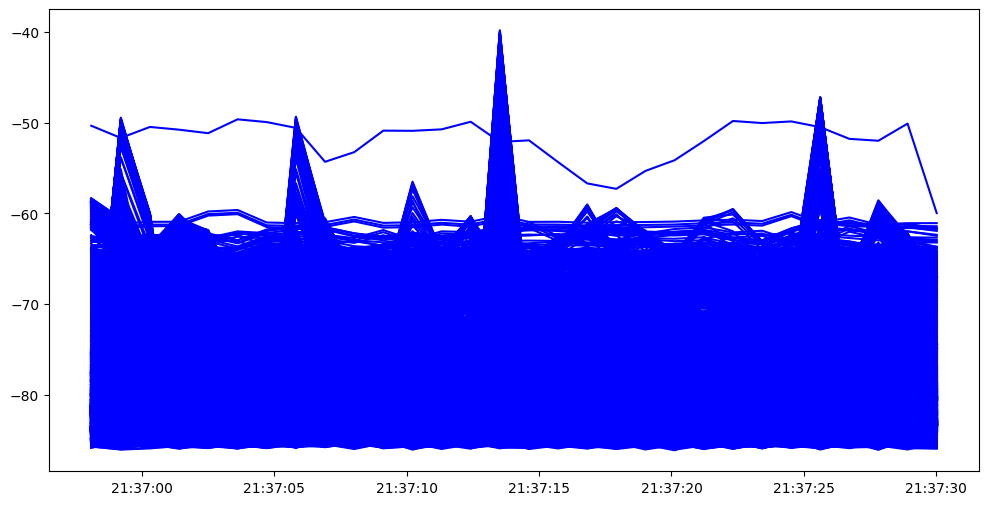

In [140]:
# Predict anomalies on the combined dataset
anomaly_preds = clf.predict(data)

# Plot the data with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.iloc[:], color='blue', label='Normal')
plt.scatter(data.index[anomaly_preds == -1], data[:][anomaly_preds == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Signal Power')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()
